In [4]:
import pandas as pd
import mysql.connector
from mysql.connector import Error
import logging


db_config = {
    'host': 'localhost',
    'database': 'sports_db',
    'user': 'root',
    'password': 'Krish_1305'
}

def connect_to_database():
    try:
        connection = mysql.connector.connect(**db_config)
        if connection.is_connected():
            print("Connected to MySQL database")
            return connection
    except Error as e:
        print(f"Error connecting to MySQL database: {e}")

def ingest_data(connection, file_path):
    try:
        df = pd.read_csv(file_path)

        cursor = connection.cursor()
        for _, row in df.iterrows():
            query = ["INSERT INTO sports_data (Player, Team, Age, Height, Weight, Position, Goals, Assists, Yellow_Cards, Red_Cards, Pass_Completion_Rate, Distance_Covered, Sprints, Shots_On_Target, Tackles_Won, Clean_Sheets, Player_Fatigue, Match_Pressure, Injury_History, Training_Hours, Fatigue_Injury_Correlation, Pressure_Performance_Impact, Effective_Training, Season) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"]
            cursor.execute(query, tuple(row))
        connection.commit()
        print(f"Data from {file_path} ingested successfully")
    except Error as e:
        print(f"Error ingesting data from {file_path}: {e}")


def ingest_data_sequential(file_paths):
    connection = connect_to_database()
    if connection:
        for file_path in file_paths:
            ingest_data(connection, file_path)
        connection.close()
        print("MySQL connection is closed")

if __name__ == "__main__":
    file_paths = ["Sports_Dataset_Cleaned2.csv"] 
    ingest_data_sequential(file_paths)

Connected to MySQL database
Data from Sports_Dataset_Cleaned2.csv ingested successfully
MySQL connection is closed


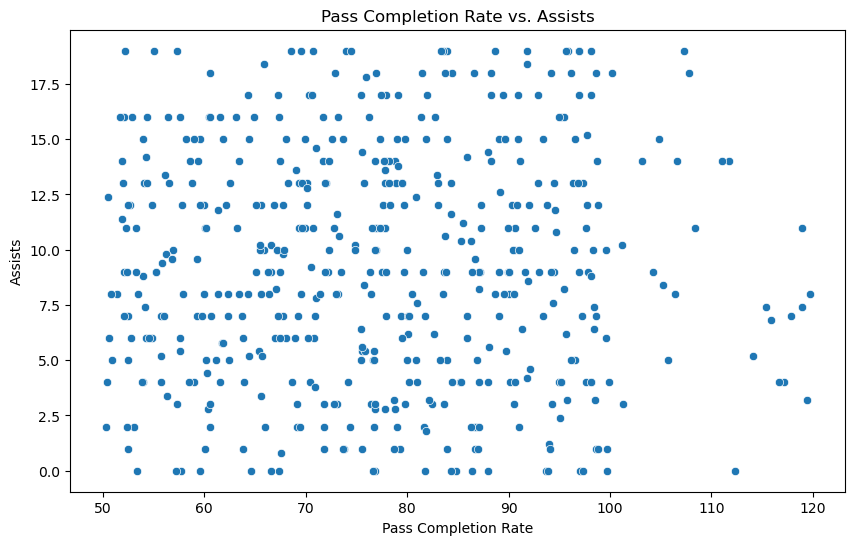

C:\Users\Krish laptop\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


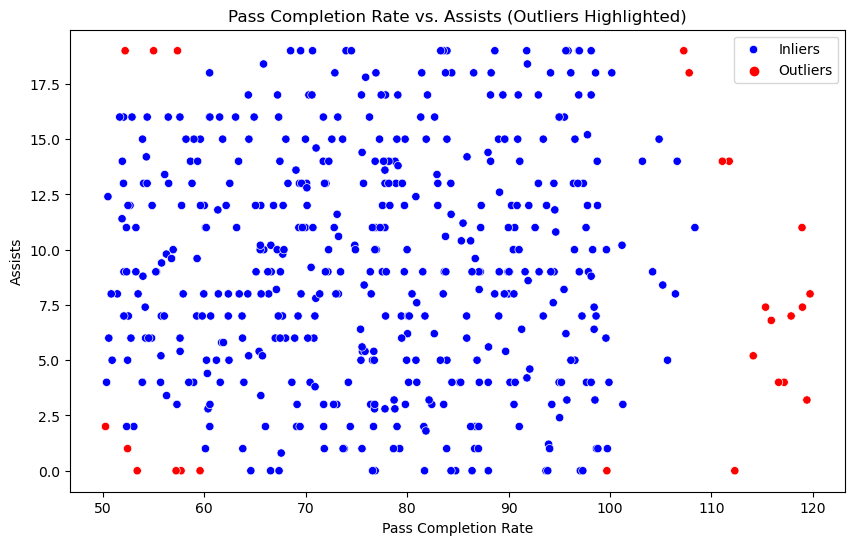

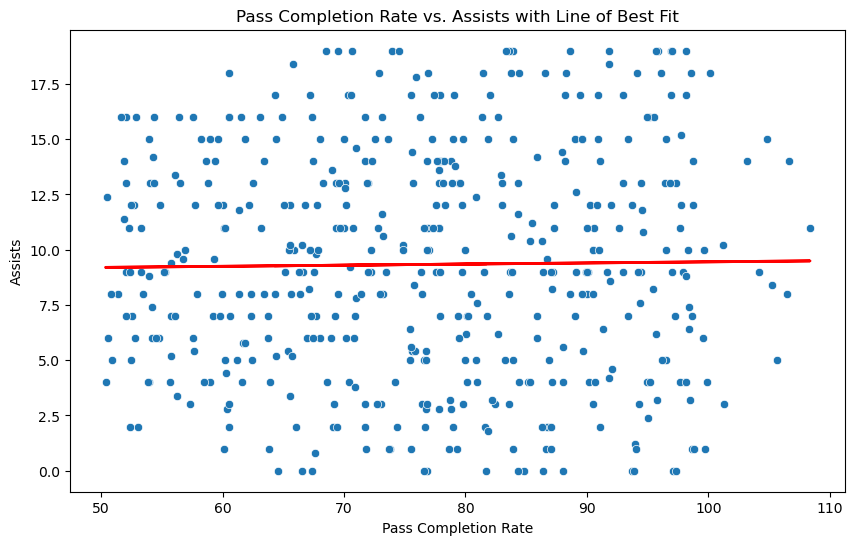

R-squared: 0.0001985913116430149
Cross-Validation R-squared Scores: [ 0.00042541 -0.03632339 -0.00468874 -0.00143829 -0.00786881]
Average Cross-Validation R-squared Score: -0.00997876408046212


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

file_path = 'Sports_Dataset_Cleaned2.csv'
df= pd.read_csv(file_path)
df=df.head(500)

data= df[['PassCompletionRate', 'Assists']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=data)
plt.title('Pass Completion Rate vs. Assists')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.show()

iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(data)

data['Outlier'] = outliers

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', hue='Outlier', data=data, palette={1: 'blue', -1: 'red'})
plt.title('Pass Completion Rate vs. Assists (Outliers Highlighted)')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.legend(['Inliers', 'Outliers'])
plt.show()

cleaned_data = data[data['Outlier'] == 1]

X = cleaned_data[['PassCompletionRate']]
y = cleaned_data['Assists']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PassCompletionRate', y='Assists', data=cleaned_data)
plt.plot(cleaned_data['PassCompletionRate'], y_pred, color='red', linewidth=2)
plt.title('Pass Completion Rate vs. Assists with Line of Best Fit')
plt.xlabel('Pass Completion Rate')
plt.ylabel('Assists')
plt.show()

r_squared = model.score(X, y)
print(f'R-squared: {r_squared}')

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared Scores: {cv_scores}')
print(f'Average Cross-Validation R-squared Score: {np.mean(cv_scores)}')